<a href="https://colab.research.google.com/github/Kaiziferr/deep_learning/blob/master/multilayer_perceptron/13_workshop_MNIST_multilayer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense

from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

import matplotlib.pyplot as plt
import numpy as np

# **LOAD DATA**
---



In [65]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

# **Holdount**

---



In [66]:
X_train, X_test, y_train, y_test = train_test_split(
    X_train,
    y_train,
    train_size=0.95, # there is a lot of data
    random_state=12354,
    stratify=y_train
)

In [67]:
print(f'Dimensiones del conjunto de características de train: {X_train.shape}')
print(f'Dimensiones del conjunto de etiquetas de train: {y_train.shape}')
print(f'Dimensiones del conjunto de etiquetas de train: {X_test.shape}')
print(f'Dimensiones del conjunto de etiquetas de train: {y_test.shape}')
print(f'Dimensiones del conjunto de etiquetas de test: {X_valid.shape}')
print(f'Dimensiones del conjunto de etiquetas de test: {y_valid.shape}')

Dimensiones del conjunto de características de train: (57000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (57000,)
Dimensiones del conjunto de etiquetas de train: (3000, 28, 28)
Dimensiones del conjunto de etiquetas de train: (3000,)
Dimensiones del conjunto de etiquetas de test: (10000, 28, 28)
Dimensiones del conjunto de etiquetas de test: (10000,)


# **Plot**

---



In [68]:
def show_image(images, gray = True):
  fig = plt.figure(figsize=(8,8))
  index = np.random.randint(len(images), size = 100)
  for i in range(100):
    fig.add_subplot(10,10, i + 1)
    plt.axis('off')
    if gray:
      color = 'gray'
    else:
      color = None
    plt.imshow(images[index[i]], cmap = color)
plt.show()

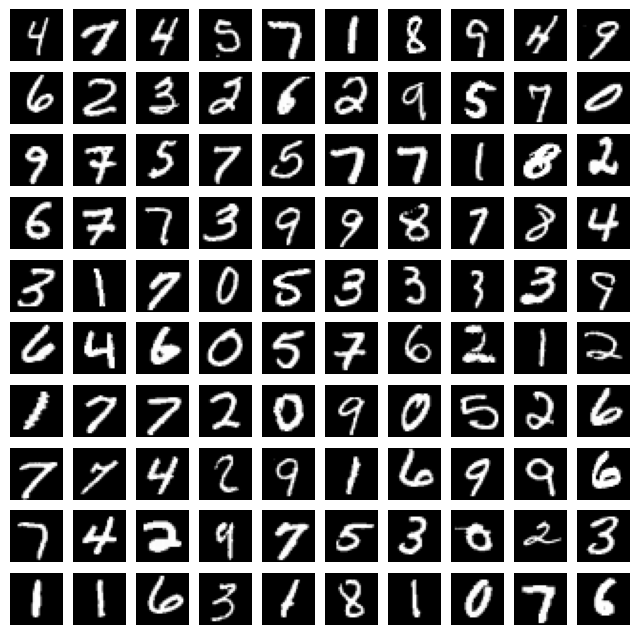

In [69]:
show_image(X_train)

In [70]:
X_train.shape

(57000, 28, 28)

# **Reestructuración y Normalización**

---



In [71]:
X_train = X_train.astype('float32')
X_train /= 255

X_test = X_test.astype('float32')
X_test /= 255


X_valid = X_valid.astype('float32')
X_valid /= 255

In [72]:
X_train.shape

(57000, 28, 28)

In [73]:
X_train = X_train.reshape(X_train.shape[0], -1)
y_train = to_categorical(y_train, num_classes=10)

print("Dimensiones del conjunto de características de train aplanadas: {}".format(X_train.shape))
print("Dimensiones del conjunto de etiquetas de train en one hot: {}".format(y_train.shape))

Dimensiones del conjunto de características de train aplanadas: (57000, 784)
Dimensiones del conjunto de etiquetas de train en one hot: (57000, 10)


In [74]:
X_test = X_test.reshape(X_test.shape[0], -1)
y_test = to_categorical(y_test, num_classes=10)

print("Dimensiones del conjunto de características de test aplanadas: {}".format(X_test.shape))
print("Dimensiones del conjunto de etiquetas de test en one hot: {}".format(y_test.shape))

Dimensiones del conjunto de características de test aplanadas: (3000, 784)
Dimensiones del conjunto de etiquetas de test en one hot: (3000, 10)


In [75]:
X_valid = X_valid.reshape(X_valid.shape[0], -1)
y_valid = to_categorical(y_valid, num_classes=10)

print("Dimensiones del conjunto de características de validación aplanadas: {}".format(X_valid.shape))
print("Dimensiones del conjunto de etiquetas de validación en one hot: {}".format(y_valid.shape))

Dimensiones del conjunto de características de validación aplanadas: (10000, 784)
Dimensiones del conjunto de etiquetas de validación en one hot: (10000, 10)


# **Model**

---



In [76]:
model = Sequential()
model.add(
    Dense(32, input_shape=(784,), activation='relu', kernel_initializer='glorot_uniform')
)
model.add(
    Dense(32, activation='relu', kernel_initializer='glorot_uniform')
)
model.add(Dense(10, activation='softmax'))

In [77]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 32)                25120     
                                                                 
 dense_7 (Dense)             (None, 32)                1056      
                                                                 
 dense_8 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# **Compile and fit**

---



In [78]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'sgd',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    batch_size = 128,
    epochs = 128,
    verbose= 0
)

In [79]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


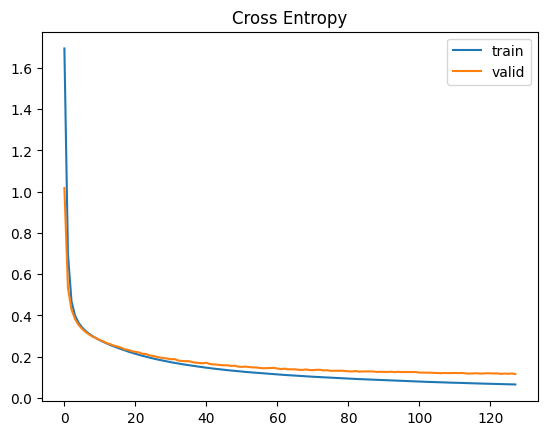

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train','valid'])
plt.title('Cross Entropy')
plt.show()

- Hay convergencia, pero se evidencia un ligero overfitting

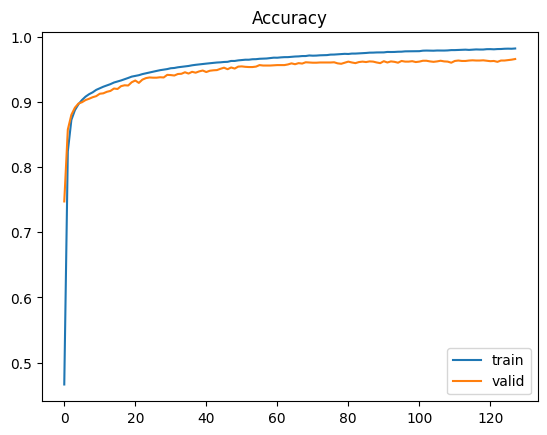

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train','valid'])
plt.title('Accuracy')
plt.show()

Predictions with keras
- predict: la salida de la última capa.
- predict_proba: las probabilidades normalizadas de las salidas (si nuestra red ya incluye softmax al final, el resultado es el mismo que la función anterior).
- predict_class: la clase predicha, equivalente al argmax a las funciones anteriores.

#**Predictions about data test**

In [84]:
predictions = model.predict(X_test)
predictions = np.argmax(predictions, axis = 1)
predictions

94/94 [==============================] - 0s 2ms/step


array([1, 0, 2, ..., 0, 2, 9])

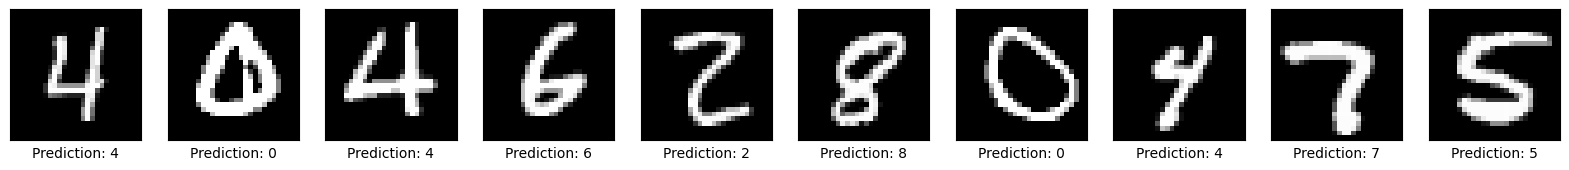

In [85]:
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(X_test), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(X_test[index[i]].reshape((28,28)), cmap='gray')
plt.show()

# **Predictions about data validate**

In [86]:
predictions = model.predict(X_valid)
predictions = np.argmax(predictions, axis=1)

313/313 [==============================] - 1s 3ms/step


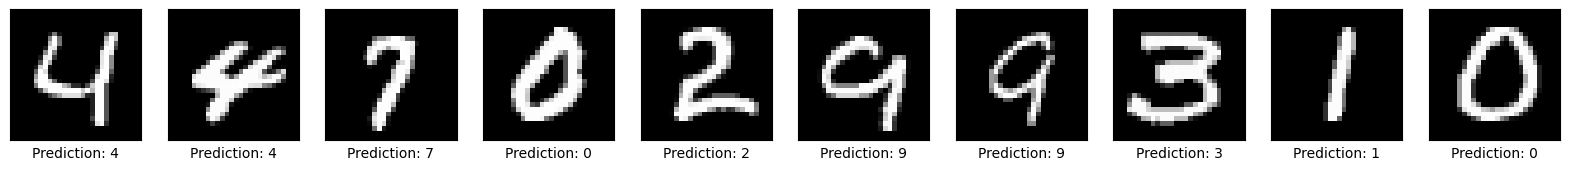

In [87]:
fig=plt.figure(figsize=(20, 8))
index = np.random.randint(len(X_valid), size=10)
for i in range(10):
    fig_i = fig.add_subplot(1, 10, i+1)
    fig_i.set_xticks(())
    fig_i.set_yticks(())
    fig_i.set_xlabel("Prediction: {}".format(predictions[index[i]]))
    plt.imshow(X_valid[index[i]].reshape((28,28)), cmap='gray')
plt.show()

- EL modelo predijo de manera correcta las imagenes de los digitos.

# **Evualación**

In [93]:
# Evaluate datos de entrenamiento
score = model.evaluate(X_train, y_train)
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

1782/1782 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9821
Loss: 0.06458394974470139
Accuracy: 0.9820877313613892


In [94]:
# Evaluate datos de test
score = model.evaluate(X_test, y_test)
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

94/94 [==============================] - 0s 2ms/step - loss: 0.1157 - accuracy: 0.9660
Loss: 0.11568043380975723
Accuracy: 0.9660000205039978


In [95]:
# Evaluate datos de valid
score = model.evaluate(X_valid, y_valid)
print("Loss: {}\nAccuracy: {}".format(score[0],score[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.1046 - accuracy: 0.9702
Loss: 0.10456937551498413
Accuracy: 0.9702000021934509
